<h1 style="color:blue; text-align:center">Basics of scikit-learn</h1><br/><br/>

<img src='http://scikit-learn.org/dev/_static/ml_map.png'><br/><br/>

### Thought Process (steps involved)

**1. Import an estimator**

**2. Create features matrix X : array-like, shape [n_samples, n_features] and target vector** 

**3. Fit the model to your data by calling the fit() method of the model instance after setting hyper parameters** 
    
   - Hyperparameter in a model is a configuration that is external to the model. 
    
   - Hyper parameters' values cannot be estimated from data. 
    
**4. Apply the model to new data**

**5. Evaluate model performance**

"Many models have important parameters which cannot be directly estimated from the data. For example, in the K-nearest neighbor classification model … This type of model parameter is referred to as a tuning parameter because there is no analytical formula available to calculate an appropriate value."— Page 64-65, Applied Predictive Modeling, 2013 <br/><br/>

### Let's just start with simple linear regression

In [1]:
# Create some simple data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
x = np.random.random(20)
x

array([ 0.5488135 ,  0.71518937,  0.60276338,  0.54488318,  0.4236548 ,
        0.64589411,  0.43758721,  0.891773  ,  0.96366276,  0.38344152,
        0.79172504,  0.52889492,  0.56804456,  0.92559664,  0.07103606,
        0.0871293 ,  0.0202184 ,  0.83261985,  0.77815675,  0.87001215])

In [3]:
print x.ndim
print x.shape

1
(20L,)


### Create a relationship between target (y) and predictor (x)
#### y_values = intercept + coefficient * x_values + random_noise <br/>

In [4]:
y = 3 * x + 2 + np.random.randn(20)
y
#X.squeeze() returns the input array, but with all or a subset of the dimensions of length 1 removed.

array([ 5.14051958,  3.94040984,  4.12135783,  2.78055381,  0.71797458,
        4.59130093,  4.17719783,  3.93315398,  7.16074291,  1.69595888,
        4.42093363,  3.39950091,  5.2369129 ,  6.24614868,  2.3680556 ,
        2.63955042,  1.17286944,  2.51706307,  3.9865581 ,  4.76638541])

In [5]:
print y.ndim
print y.shape

1
(20L,)


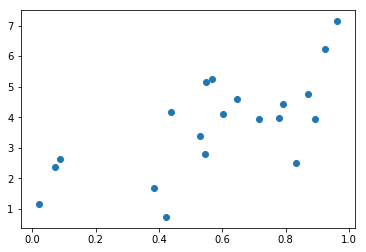

In [6]:
plt.scatter(x, y)
plt.show()

#### step-1 **Import an estimator**

In [7]:
# import estimator(model class)
from sklearn.linear_model import LinearRegression

#### step-2 **Create features matrix X : array-like, shape [n_samples, n_features] and target vector** 

In [8]:
x.shape

(20L,)

In [9]:
# create feature matrix and target vector
# make it a matrix of size [n_samples, n_features] 
X = x[:, np.newaxis]
X.shape

(20L, 1L)

#### step-3 Fit the model to your data by calling the fit() method of the model instance after setting hyper parameters

In [10]:
# Tune hyper parameter; intercept = True
my_model = LinearRegression(fit_intercept=True)

In [11]:
my_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### step-4 Apply the model to new data
    - once you fit a model you get access to some internal computations
    - they are known as model parameters
    

In [12]:
# coeficient (or slope)
# y = mx + c
# m slope; c intercept
round(my_model.coef_,3)

3.935

In [13]:
# intercept
my_model.intercept_

1.4622907890393395

##### learned equation<br/>

##### y_predicted = 3.935*(X)+ 3.95
#### y_actual : y = 3 * x + 2 + np.random.randn(20)

##### Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves as for ML the focus is on predictions 

#### step-4 (continued..)
- use predict() method of the api

In [14]:
# predict on initial values
y_pred = my_model.predict(X)
y_pred

array([ 3.62182323,  4.27649748,  3.83411119,  3.60635776,  3.12933483,
        4.00382681,  3.18415763,  4.97133841,  5.25421824,  2.97109914,
        4.57765856,  3.54344537,  3.69749573,  5.10443143,  1.74181137,
        1.80513685,  1.54184839,  4.738576  ,  4.52426855,  4.88571139])

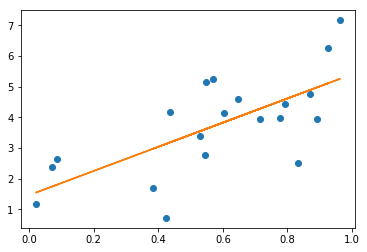

In [15]:
plt.plot(X, y, 'o')
plt.plot(X, y_pred)
plt.show()

##### 5. Evaluation
- goodness of fit

In [16]:
# simple evaluation using goodness of fit
# R-squared
from sklearn.metrics import r2_score

In [17]:
r2_score(y,y_pred)

0.46752494572004177

In [18]:
# make predictions
# get new Xs
x_new = np.random.random(20)
X_new = x_new[:, np.newaxis]
X_new

array([[ 0.66676672],
       [ 0.67063787],
       [ 0.21038256],
       [ 0.1289263 ],
       [ 0.31542835],
       [ 0.36371077],
       [ 0.57019677],
       [ 0.43860151],
       [ 0.98837384],
       [ 0.10204481],
       [ 0.20887676],
       [ 0.16130952],
       [ 0.65310833],
       [ 0.2532916 ],
       [ 0.46631077],
       [ 0.24442559],
       [ 0.15896958],
       [ 0.11037514],
       [ 0.65632959],
       [ 0.13818295]])

In [19]:
y_new =  3 * x_new + 2 + np.random.randn(20)
y_new

array([ 3.48949501,  2.83128142,  2.60296545,  2.81511076,  3.01280228,
        3.39360421,  3.07626822,  2.95306337,  4.29266107,  1.94658127,
        1.81348399,  0.75764595,  4.13675112,  2.35809387,  1.76873397,
        3.19605903,  1.56961039,  2.38307082,  4.69807933,  2.54353176])

In [20]:
# use the new X_new to check the prediction
y_fit = my_model.predict(X_new)

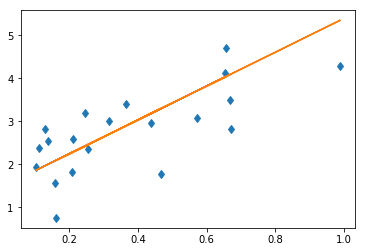

In [21]:
plt.plot(X_new, y_new, 'd')
plt.plot(X_new, y_fit)
plt.show()

#### R-square measurement on new data

In [22]:
round(r2_score(y_new,y_fit),3)

0.383

<br/><br/><br/><br/>

### Working with too many features in linear regression
- Try Lasso regression

In [23]:
# 1. bring in the estimator
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
my_lasso = linear_model.Lasso() # later try linear_model.Lasso(alpha = 0.1)

In [25]:
# 2. get data
from sklearn import datasets
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

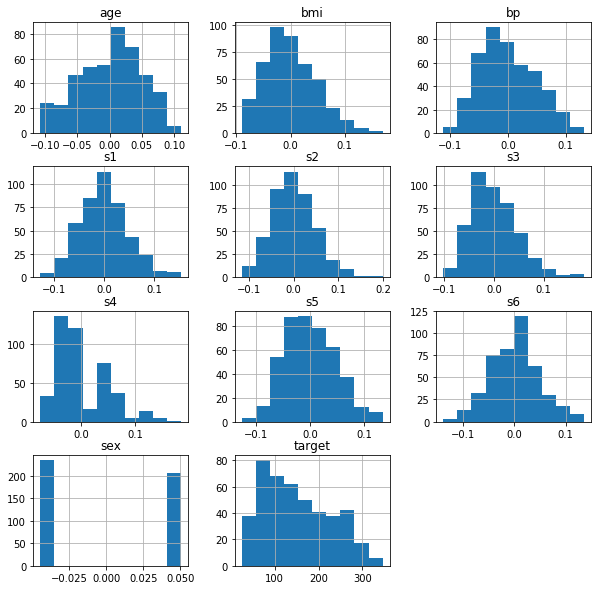

In [26]:
# if you want to use pandas
import pandas as pd
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = pd.DataFrame(diabetes.target)
df.head()

df.hist(figsize=(10, 10))
plt.show()

In [27]:
# correlation between all the variables
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


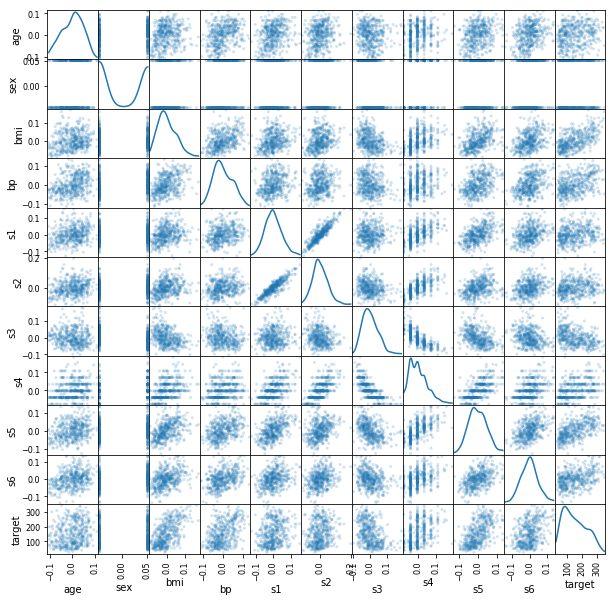

In [28]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

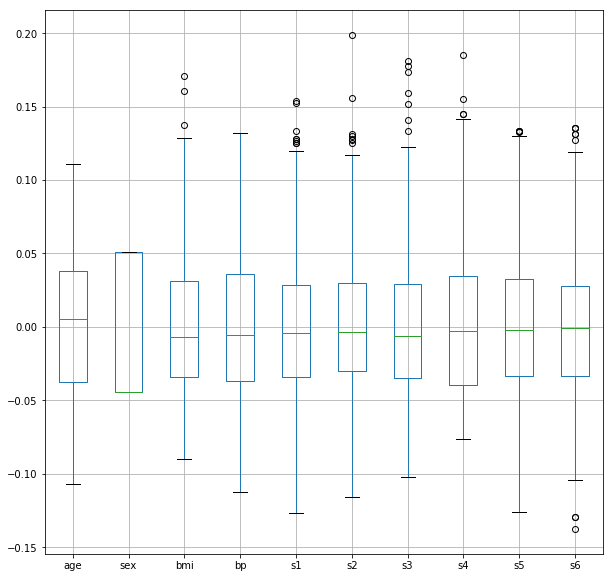

In [29]:
#some box plot
# help me
dff = df.iloc[:,0:10]
dff.boxplot(figsize=(10, 10))
plt.show()

In [30]:
# do a 70 30 split
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,test_size=0.3)

In [31]:
# 3. fit the model
my_lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
# Make predictions using the testing set
y_pred = my_lasso.predict(x_test)

In [33]:
# The coefficients
print('Coefficients: \n', my_lasso.coef_)
print(diabetes.feature_names)

('Coefficients: \n', array([   0.        ,    0.        ,  389.48448995,   23.26113746,
          0.        ,    0.        ,   -0.        ,    0.        ,
        283.82475803,    0.        ]))
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [34]:
from sklearn.metrics import r2_score

In [35]:
# R-Square
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.37


#### House Price Prediction
- Boston housing dataset

### Let's try a classification algorithm

### Logistic Regression

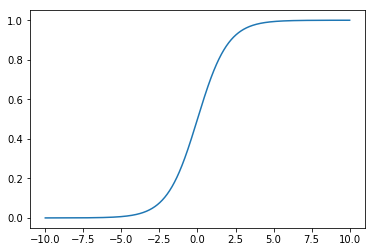

In [36]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+np.exp(-item)))
    return a

x = np.linspace(-10, 10,1000)

plt.plot(x,sigmoid(x)) # sigmoid applied on x values
plt.show()

##### Iris dataset 
task : learn (train a model) on a portion of the Iris data

Question: given a trained model, how well can we predict the remaining labels? 

In [37]:
# 1. bring in the estimator
from sklearn import linear_model

In [38]:
# model instance with a hyper parameter
logistic = linear_model.LogisticRegression()

C : float, default: 1.0

Inverse of regularization strength; must be a positive float. 
Like in support vector machines, smaller values specify stronger regularization

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [39]:
# 2. get data
from sklearn import datasets
# Load the iris dataset
iris = datasets.load_iris()
iris?
# do iris.<tab> to see what it contains

In [40]:
# data and target needs to be fetched

iris_X = iris.data

iris_y = iris.target

In [41]:
# unique classes in target
classes, counts = np.unique(iris_y, return_counts=True)
print classes
print counts

[0 1 2]
[50 50 50]


In [42]:
class_names = iris.target_names

In [43]:
# create a train test split
from sklearn.cross_validation import train_test_split

iris_X_train, iris_X_test, iris_y_train, iris_y_test  = train_test_split(iris_X, iris_y,test_size=0.3 )

In [44]:
# 3. fit your model now
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
# 4. predict on your test
y_pred = logistic.predict(iris_X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1])

In [46]:
# 5. Evaluate
from sklearn.metrics import accuracy_score
score = accuracy_score( iris_y_test, y_pred)
round(score, 3)

1.0

In [47]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(iris_y_test, y_pred)
cnf_matrix

array([[16,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 14]], dtype=int64)

In [48]:
# a plotting function for confusion matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[16  0  0]
 [ 0 15  0]
 [ 0  0 14]]


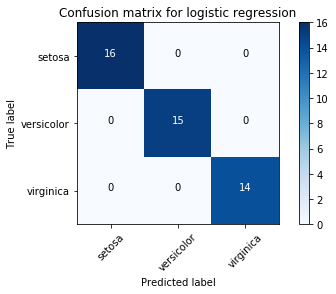

In [49]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for logistic regression')
plt.show()

#### Comapre classification using logistic regression with an unsupervised technique

### Clustering

In [50]:
# 1. estimator
from sklearn.cluster import KMeans

In [51]:
# 2. get the dataset
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)

y_target = pd.DataFrame(iris.target)

In [52]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
y_target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [54]:
col_names = iris.feature_names
print col_names

target_labels = iris.target_names
print target_labels

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [55]:
X.columns = col_names
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
y_target.columns = ['Labels']

In [57]:
# we set seed for reproducibility
np.random.seed(0)

0
1
2


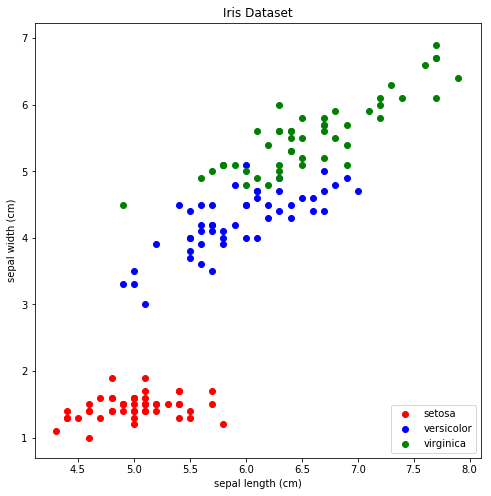

In [58]:
plt.figure(figsize=(8,8))

for target in set(iris.target):
    print target
    x = [iris.data[i,0] for i in range(len(iris.target)) if iris.target[i]==target]
    y = [iris.data[i,2] for i in range(len(iris.target)) if iris.target[i]==target]
    plt.scatter(x, y, color=['red', 'blue', 'green'][target], label=iris.target_names[target])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris Dataset')
plt.legend(iris.target_names, loc='lower right')
plt.show()

0
1
2


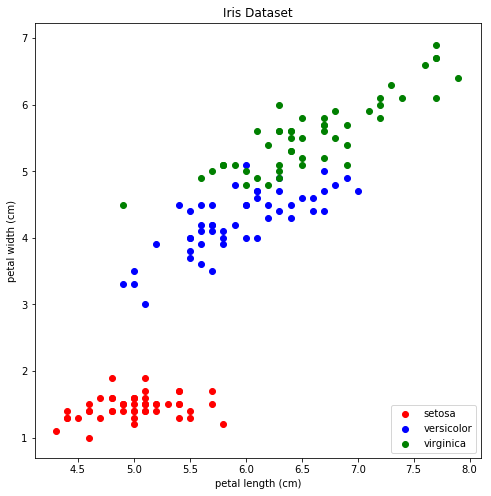

In [59]:
plt.figure(figsize=(8,8))

for target in set(iris.target):
    print target
    x = [iris.data[i,0] for i in range(len(iris.target)) if iris.target[i]==target]
    y = [iris.data[i,2] for i in range(len(iris.target)) if iris.target[i]==target]
    plt.scatter(x, y, color=['red', 'blue', 'green'][target], label=iris.target_names[target])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('Iris Dataset')
plt.legend(iris.target_names, loc='lower right')
plt.show()

In [60]:
# instantiate a model
cluster_model = KMeans(n_clusters=3)

In [61]:
# 3. fit your model now
cluster_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [63]:
# 4. Evaluate
from sklearn.metrics import accuracy_score
y_pred = np.choose(cluster_model.labels_, [1, 0, 2]).astype('int')
round(accuracy_score(y_target, y_pred),3)

0.893

In [64]:
cnf_matrix_kmeans = confusion_matrix(y_target, y_pred)
cnf_matrix_kmeans

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

Confusion matrix, without normalization
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


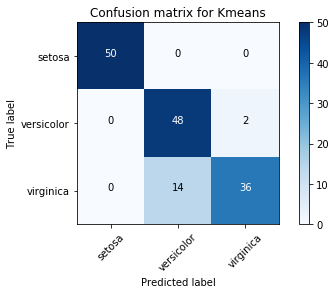

In [65]:
plot_confusion_matrix(cnf_matrix_kmeans, classes=target_labels,
                      title='Confusion matrix for Kmeans')
plt.show()

## Machine Learning Models Cheat Sheet

## Estimators

Given a scikit-learn *estimator* object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

### References

1. Credits: Forked from [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) by Jake VanderPlas

2. <a href='http://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-intro.ipynb'>source</a>
3. Python Data Science Handbook by Jake VanderPlas
4. plot issues: https://stackoverflow.com/questions/35105781/missing-labels-in-matplotlib-scatter-plot-legend


Good discussion on stackoverflow on regularization
https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul